In [1]:
from os.path import exists, join  
import glob
import numpy as np

from nilearn import plotting
import matplotlib.pyplot as plt
%matplotlib inline

/dartfs-hpc/rc/home/4/f003jd4/.conda/envs/comp_meth_env/lib/python2.7/site-packages/nilearn/__init__.py:73: DeprecationWarning: Python2 support is deprecated and will be removed in the next release. Consider switching to Python 3.6 or 3.7.
  _python_deprecation_warnings()


In [2]:
thresholds = {
    'behavior': .25,
    'taxonomy': .20,
    'conditions': .05,
}

behavior_lh_lateral
behavior_lh_medial
behavior_lh_dorsal
behavior_lh_ventral
behavior_lh_anterior
behavior_lh_posterior
behavior_rh_lateral
behavior_rh_medial
behavior_rh_dorsal
behavior_rh_ventral
behavior_rh_anterior
behavior_rh_posterior
taxonomy_lh_lateral
taxonomy_lh_medial
taxonomy_lh_dorsal
taxonomy_lh_ventral
taxonomy_lh_anterior
taxonomy_lh_posterior
taxonomy_rh_lateral
taxonomy_rh_medial


/dartfs-hpc/rc/home/4/f003jd4/.conda/envs/comp_meth_env/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


taxonomy_rh_dorsal
taxonomy_rh_ventral
taxonomy_rh_anterior
taxonomy_rh_posterior
conditions_lh_lateral
conditions_lh_medial
conditions_lh_dorsal
conditions_lh_ventral
conditions_lh_anterior
conditions_lh_posterior
conditions_rh_lateral
conditions_rh_medial
conditions_rh_dorsal
conditions_rh_ventral
conditions_rh_anterior
conditions_rh_posterior


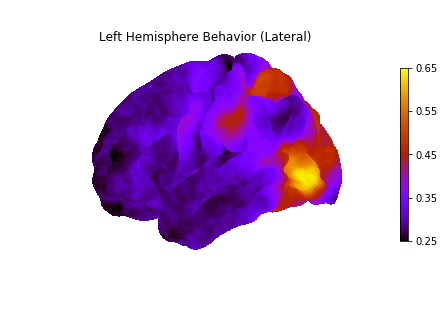

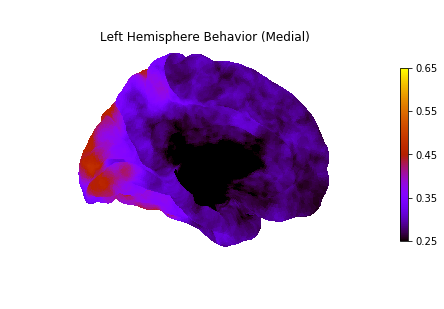

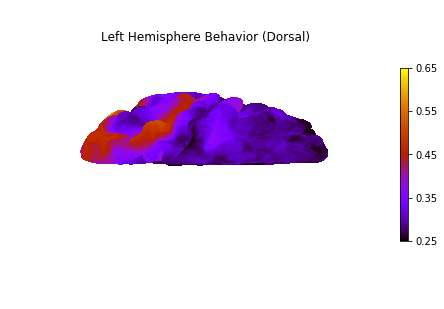

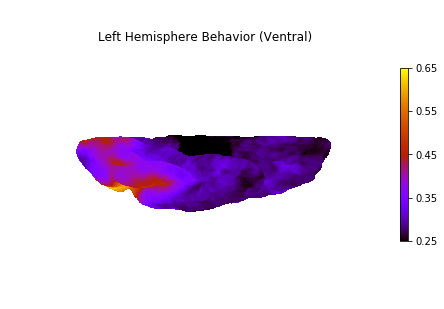

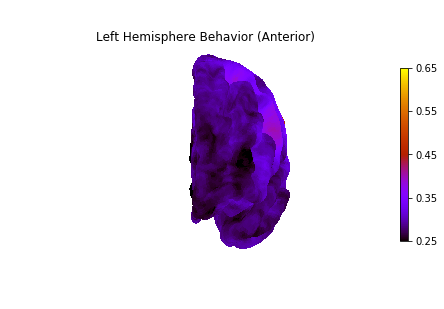

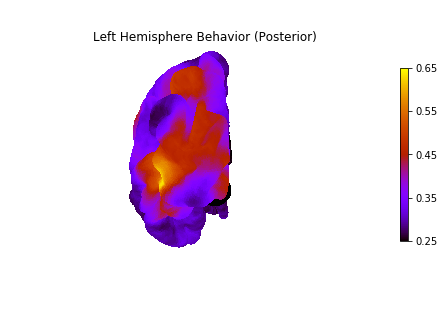

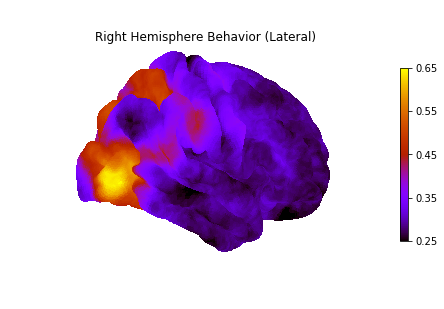

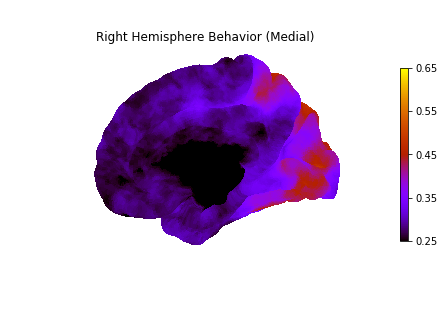

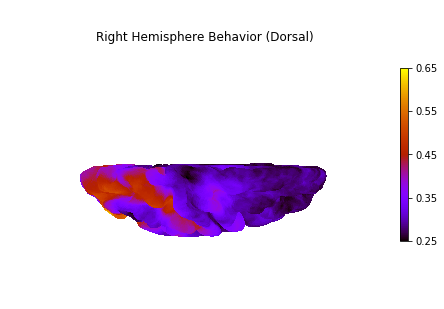

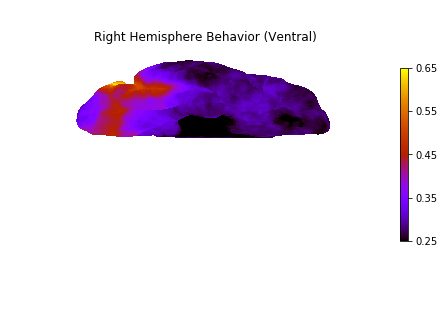

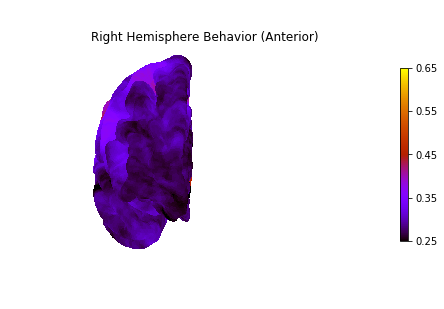

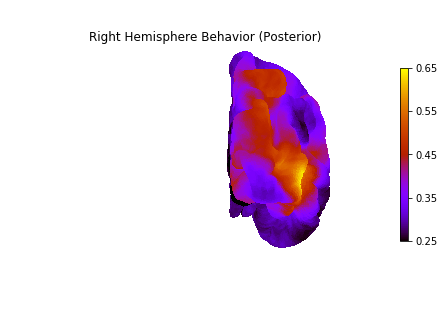

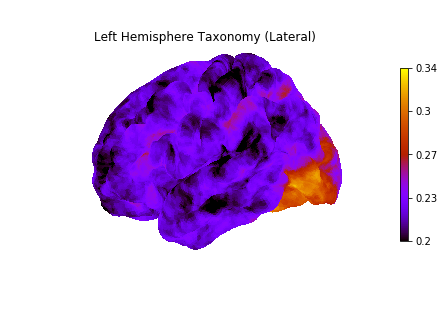

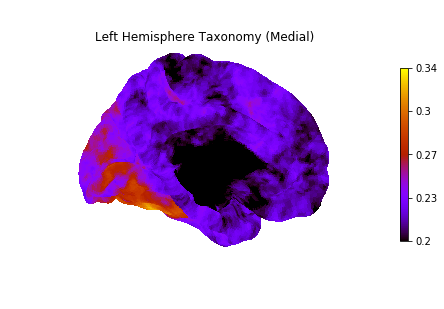

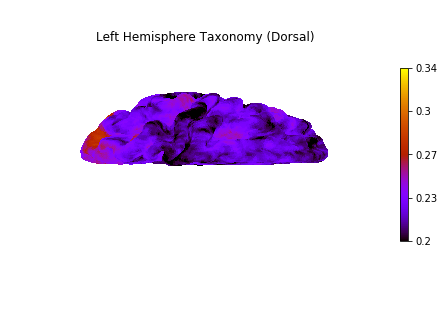

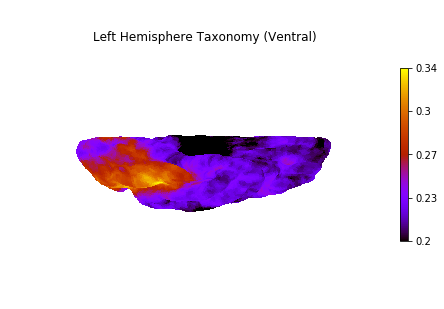

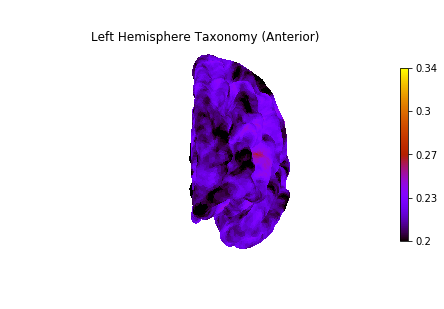

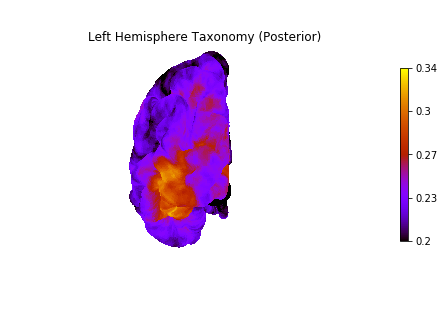

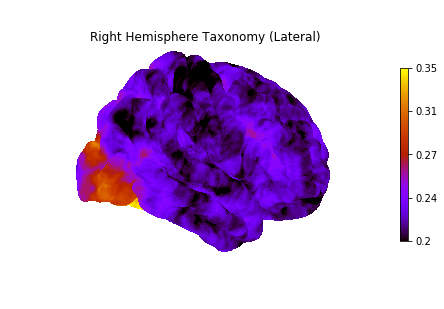

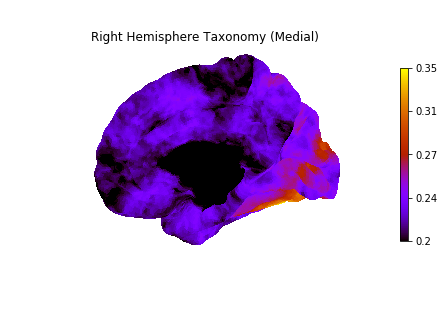

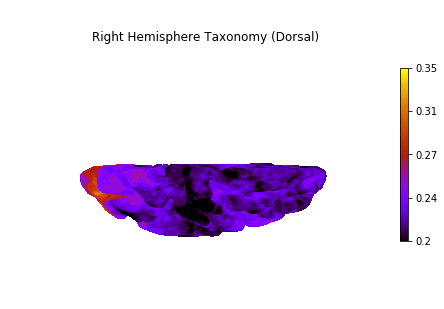

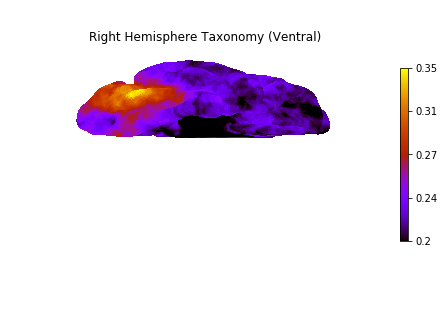

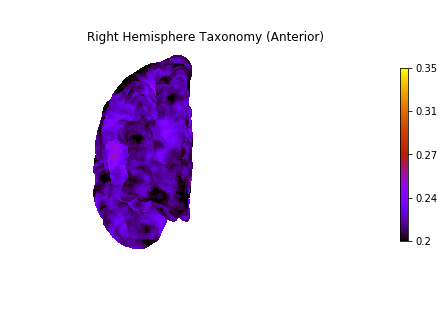

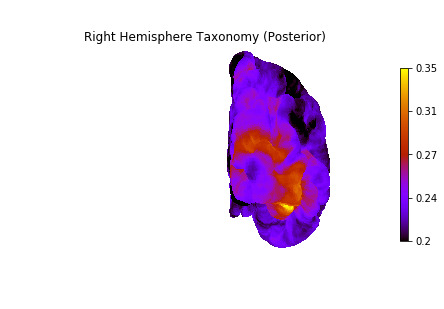

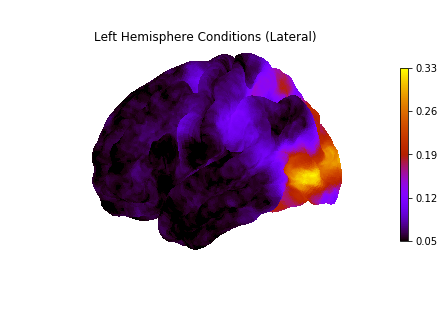

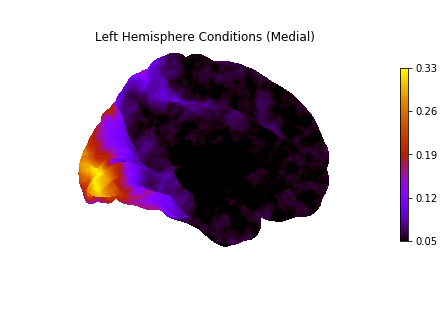

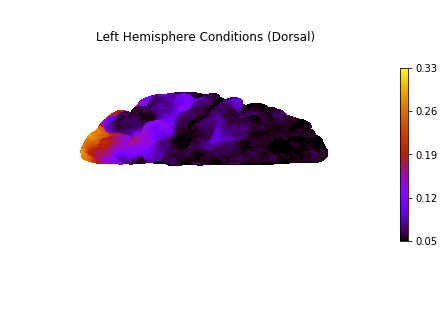

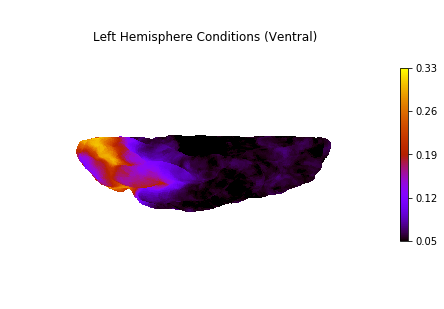

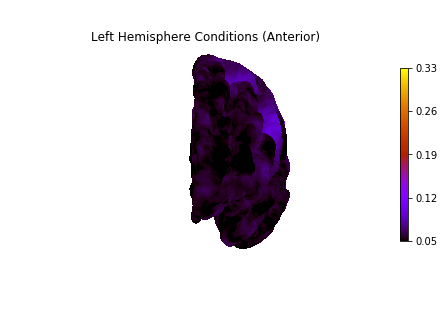

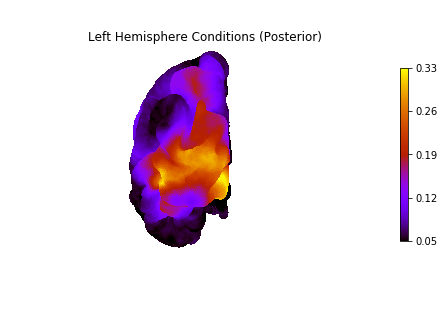

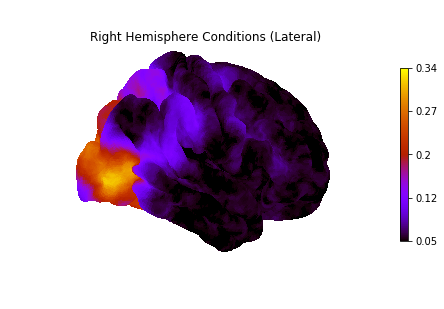

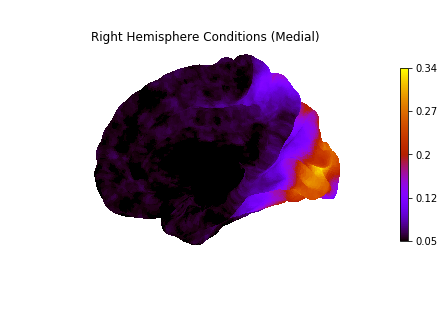

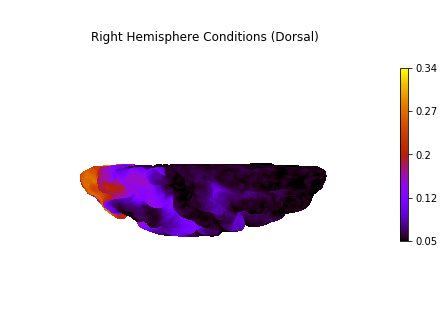

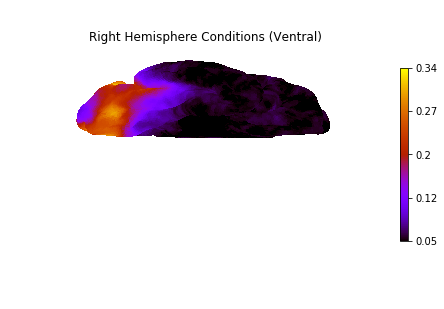

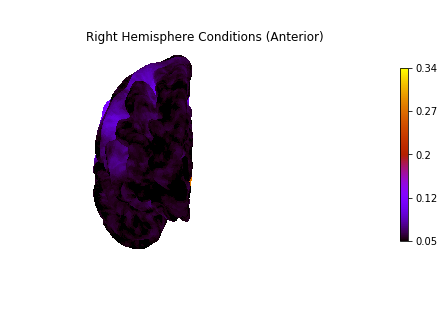

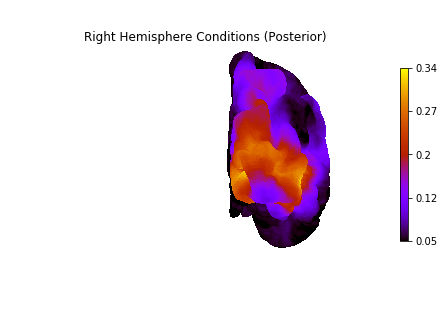

In [3]:
for attend in ['behavior', 'taxonomy', 'conditions']:
    
    for hemisphere in ['left','right']:
        hemi = hemisphere[0]+'h' #to account for "lh" and "left" for different name needs

        file_list = glob.glob("../results/*%s_%s.npy" % (attend, hemi))
        accuracies = np.array(np.load(file_list[0])) # Get first file to get shape

        for file_n in file_list[1:]: 
            accuracies = np.vstack((accuracies, np.load(file_n))) # Add the rest of files
            
        for view in ['lateral', 'medial', 'dorsal', 'ventral', 'anterior', 'posterior']:
        
            #Plot
            plotting.plot_surf('../glm/%s.pial.gii' % hemi,
                           np.mean(accuracies, axis=0),
                           colorbar = True,
                           vmin=thresholds[attend],
                           title = '%s Hemisphere %s (%s)' % (hemisphere.capitalize(), attend.capitalize(), view.capitalize()),
                           hemi = hemisphere, 
                           view = view,
                           cmap = 'gnuplot')
            plt.savefig('../figs/%s_%s_%s' % (attend, hemi, view))
            print('%s_%s_%s' % (attend, hemi, view))

In [4]:
file_list

[]